<a href="https://colab.research.google.com/github/Dilavarj7/Automated-Question-Answering-System--Team1---Capstone-Project/blob/main/Q_A_System_building_Team1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q/A System

###Database creation from text file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df["Document"][0]

'41 Essential Machine Learning Interview Questions www.springboard.com 18 mins read  \x0cM  achine learning interview questions are an integral part of the data science interview and the path to becoming a data scientist, machine learning engineer, or data engi-  neer. Springboard created a free guide to data science interviews, so we know exactly how they can trip up candidates! In order to help resolve that, here is a curated and created a list of key questions that you could see in a machine learning interview. There are some answers to go along with them so you don’t get stumped. You’ll be able to do well in any job interview (even for a machine learning internship) with after reading through this piece.  Machine Learning Interview Questions: Categories We’ve traditionally seen machine learning interview questions pop up in several categories. The first really has to do with the algorithms and theory behind machine learning. You’ll have to show an understanding of how algorithms co

## Building database from pdf page format

In [ ]:
# Import modules needed for this project
!pip install pdfplumber
import pdfplumber

     |████████████████████████████████| 51kB 3.4MB/s 
     |████████████████████████████████| 5.6MB 10.2MB/s 
     |████████████████████████████████| 143kB 74.9MB/s 
     |████████████████████████████████| 1.9MB 50.7MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.27-cp37-none-any.whl size=32071 sha256=1ea48c55d6f3bce3c9d4c5c37f2af708118b569610470a6ee9de41b8becfae61
  Stored in directory: /root/.cache/pip/wheels/b4/74/fc/f7b3a1a0732209027fb48a5f4392fc40d79970b11c2ba49e71
Successfully built pdfplumber


### First Book

In [ ]:
infile = '/content/drive/MyDrive/Copy of Information_retrieval.pdf'

# Get number of pages from pdf infile

pgList=[]
with pdfplumber.open(infile) as pdf:
  totalpages = len (pdf.pages)
  for i in range(0,totalpages):
    page = pdf.pages[i]
    row = page.extract_text().split('\n')
    pgList.append(row)
print("Number of pages are: ",len(pgList))

Number of pages are:  569


In [ ]:
str1 =" "
finalList=[]
for i in pgList:
  l=[str1.join(i)]
  finalList.append(l)

df1 = pd.DataFrame(finalList,columns=['document'])
df1.tail()

,document
564,"540 Index indexer,67 latentsemanticindexing,19..."
565,"Index 541 memory-basedlearning,300 nonlinearpr..."
566,"542 Index pooling,164,174 model,14 pornography..."
567,"Index 543 sentimentdetection,254 stochasticmat..."
568,"544 Index top-downclustering,395 XMLelement,19..."


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


### Second Book

In [ ]:
infile = '/content/drive/MyDrive/Copy of exploring-data-science.pdf'

# Get number of pages from pdf infile

pgList=[]
with pdfplumber.open(infile) as pdf:
  totalpages = len (pdf.pages)
  for i in range(0,totalpages):
    page = pdf.pages[i]
    row = page.extract_text().split('\n')
    pgList.append(row)
print("Number of pages are: ",len(pgList))

Number of pages are:  189


In [ ]:
str1 =" "
finalList=[]
for i in pgList:
  l=[str1.join(i)]
  finalList.append(l)

df2 = pd.DataFrame(finalList,columns=['document'])
df2.tail()

,document
184,"180 INDEX I M IBM Watson 100 ma() function, fo..."
185,INDEX 181 negative exponential profile 79 pare...
186,182 INDEX Q S qqline() function 58 scatter plo...
187,INDEX 183 text mining and analytics 96–130 ts(...
188,"184 INDEX visualizations window() function, st..."


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  189 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


### Final df

In [ ]:
frames=[df1,df2]
df=pd.concat(frames,axis=0)
df=df.reset_index()
del df['index']
df.head()

,document
0,An Introduction to Information Retrieval Draft...
1,Online edition (c)(cid:10)2009 Cambridge UP
2,An Introduction to Information Retrieval Chris...
3,DRAFT! DONOTDISTRIBUTEWITHOUTPRIORPERMISSION ©...
4,"DRAFT!©April1,2009CambridgeUniversityPress.Fee..."


In [ ]:
df.tail()

,document
753,"180 INDEX I M IBM Watson 100 ma() function, fo..."
754,INDEX 181 negative exponential profile 79 pare...
755,182 INDEX Q S qqline() function 58 scatter plo...
756,INDEX 183 text mining and analytics 96–130 ts(...
757,"184 INDEX visualizations window() function, st..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  758 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


##Text Pre-Processing using texthero

In [ ]:
!pip install texthero

     |████████████████████████████████| 1.5MB 17.9MB/s 
     |████████████████████████████████| 245kB 64.5MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import texthero as hero
from texthero import preprocessing

custom_pipeline = [preprocessing.fillna,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_digits,
                   preprocessing.remove_whitespace]
df['clean_text'] = hero.clean(df['document'], custom_pipeline)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,document,clean_text
0,An Introduction to Information Retrieval Draft...,An Introduction to Information Retrieval Draft...
1,Online edition (c)(cid:10)2009 Cambridge UP,Online edition c cid Cambridge UP
2,An Introduction to Information Retrieval Chris...,An Introduction to Information Retrieval Chris...
3,DRAFT! DONOTDISTRIBUTEWITHOUTPRIORPERMISSION ©...,DRAFT DONOTDISTRIBUTEWITHOUTPRIORPERMISSION ©2...
4,"DRAFT!©April1,2009CambridgeUniversityPress.Fee...",DRAFT ©April1 2009CambridgeUniversityPress Fee...


In [ ]:
df['tfidf'] = (hero.tfidf(df['clean_text'], max_features=100))
df.head()

,document,clean_text,tfidf
0,An Introduction to Information Retrieval Draft...,An Introduction to Information Retrieval Draft...,"[0.0, 0.0, 0.3803677685795821, 0.0, 0.0, 0.0, ..."
1,Online edition (c)(cid:10)2009 Cambridge UP,Online edition c cid Cambridge UP,"[0.0, 0.0, 0.41081169628155045, 0.0, 0.0, 0.0,..."
2,An Introduction to Information Retrieval Chris...,An Introduction to Information Retrieval Chris...,"[0.0, 0.0, 0.6352625237094893, 0.0, 0.0, 0.0, ..."
3,DRAFT! DONOTDISTRIBUTEWITHOUTPRIORPERMISSION ©...,DRAFT DONOTDISTRIBUTEWITHOUTPRIORPERMISSION ©2...,"[0.0, 0.0, 0.33556171728229045, 0.0, 0.0, 0.0,..."
4,"DRAFT!©April1,2009CambridgeUniversityPress.Fee...",DRAFT ©April1 2009CambridgeUniversityPress Fee...,"[0.0, 0.0, 0.41081169628155045, 0.0, 0.0, 0.0,..."


In [ ]:
df['named_entities'] = hero.named_entities(df['clean_text'])
df.head()

,document,clean_text,tfidf,named_entities
0,An Introduction to Information Retrieval Draft...,An Introduction to Information Retrieval Draft...,"[0.0, 0.0, 0.3803677685795821, 0.0, 0.0, 0.0, ...",[(Introduction to Information Retrieval Drafto...
1,Online edition (c)(cid:10)2009 Cambridge UP,Online edition c cid Cambridge UP,"[0.0, 0.0, 0.41081169628155045, 0.0, 0.0, 0.0,...",[]
2,An Introduction to Information Retrieval Chris...,An Introduction to Information Retrieval Chris...,"[0.0, 0.0, 0.6352625237094893, 0.0, 0.0, 0.0, ...",[]
3,DRAFT! DONOTDISTRIBUTEWITHOUTPRIORPERMISSION ©...,DRAFT DONOTDISTRIBUTEWITHOUTPRIORPERMISSION ©2...,"[0.0, 0.0, 0.33556171728229045, 0.0, 0.0, 0.0,...","[(UniversityPress, ORG, 59, 74), (Comments, OR..."
4,"DRAFT!©April1,2009CambridgeUniversityPress.Fee...",DRAFT ©April1 2009CambridgeUniversityPress Fee...,"[0.0, 0.0, 0.41081169628155045, 0.0, 0.0, 0.0,...",[]


In [ ]:
print(df["clean_text"][2])

An Introduction to Information Retrieval Christopher D Manning Prabhakar Raghavan Hinrich Schütze CambridgeUniversityPress Cambridge England Online edition c cid Cambridge UP


In [ ]:
NUM_TOP_WORDS = 100
hero.top_words(df['clean_text'])[:NUM_TOP_WORDS]

the        6692
of         3714
a          3174
and        2631
to         2496
           ... 
network     194
than        193
then        191
itbook      189
using       188
Name: clean_text, Length: 100, dtype: int64

###Top n words TfIDF

In [ ]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(df['document'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['document'])
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '0000000000', '000000000000000384', '00000000000048', '000000000001573', '0000000001', '0000001100', '0000011010111000', '0000048490', '00001', '0000100000', '000011010000110010110001', '0001', '0001000010', '000110', '0001105', '000111', '0002', '00020', '0003', '00031104', '0003695', '0004', '00048', '0005', '00052', '00054', '00055', '0006', '00062', '0008', '0008274', '00099', '00099v1s', '000and', '000articlenodesinthecollection', '000categories', '000characters', '000differentwords', '000distincttermsand', '000documents', '000documentsandcomputedf1onthenext100', '000documentsinreuters', '000documentsofthewikipediaaregoodchoices', '000documentswereused', '000documentswherethedocumentfrequenciesofauto', '000hypotheses', '000is', '000japaneseyen', '000newswireandforeignbroadcastinformationservice', '000or', '000reﬁnerygasbpd', '000terms', '001', '0010', '0010000100', '0012', '00127', '0013', '0014', '0015113', '0016', '0018', '0019', '001chanceofbeingwrong', '001level'

(4, 9)

In [ ]:
cv=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)
word_count_vector=cv.fit_transform(docs)


Word indexes:
{'an': 2919, 'introduction': 15121, 'to': 29314, 'information': 14432, 'retrieval': 23142, 'draftofapril1': 10076, '2009': 829, 'online': 19869, 'edition': 10384, 'cid': 7297, '10': 251, 'cambridge': 6689, 'up': 30480, 'christopher': 7283, 'manning': 17475, 'prabhakar': 21407, 'raghavan': 22265, 'hinrich': 13403, 'schütze': 23764, 'cambridgeuniversitypress': 6691, 'england': 10684, 'draft': 10075, 'donotdistributewithoutpriorpermission': 10004, '2009cambridge': 830, 'universitypress': 30414, 'bychristopherd': 6503, 'prabhakarraghavan': 21409, 'hinrichschütze': 13404, 'printedonapril1': 21625, 'website': 31351, 'http': 13598, 'www': 32963, 'informationretrieval': 14453, 'org': 20106, 'comments': 7785, 'corrections': 8424, 'andotherfeedbackmostwelcomeat': 3476, 'yahoogroups': 33081, 'com': 7746, 'april1': 4211, '2009cambridgeuniversitypress': 831, 'feedbackwelcome': 11560, 'brief': 6135, 'contents': 8273, 'booleanretrieval': 6040, 'thetermvocabularyandpostingslists': 28425

In [ ]:
def get_top_tf_idf_words(response, top_n=2):

    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_names[response.indices[sorted_nzs]]

In [ ]:
df['top_words']=df['tfidf'].apply(get_top_tf_idf_words)

## Trying LDA

In [ ]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [ ]:
# Define helper function
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

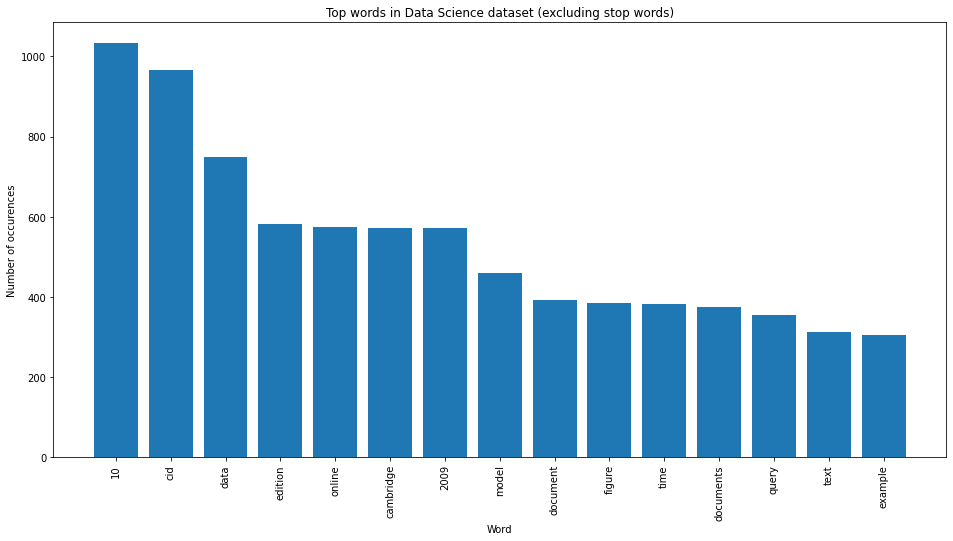

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df["document"])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in Data Science dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [ ]:
# LDA
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(small_document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(small_document_term_matrix))

NameError: ignored

## Using transformers for Question Answer Extraction

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.1MB 10.0MB/s 
     |████████████████████████████████| 901kB 34.1MB/s 
     |████████████████████████████████| 3.3MB 64.3MB/s 


In [ ]:
from transformers import pipeline

nlp = pipeline("question-answering")

In [ ]:
for i in range(0,df.shape[0]):
  print(nlp(question="What is Data?", context=df['clean_text'][i]))
  print(nlp(question="What is a Machine learning?", context=df['clean_text'][i]))
  print("--------------------------------------------------------------------------------")

{'score': 0.1780238002538681, 'start': 19, 'end': 40, 'answer': 'Information Retrieval'}
{'score': 0.6016238927841187, 'start': 19, 'end': 40, 'answer': 'Information Retrieval'}
--------------------------------------------------------------------------------
{'score': 0.41122686862945557, 'start': 0, 'end': 14, 'answer': 'Online edition'}
{'score': 0.40006962418556213, 'start': 0, 'end': 33, 'answer': 'Online edition c cid Cambridge UP'}
--------------------------------------------------------------------------------
{'score': 0.2277051955461502, 'start': 0, 'end': 40, 'answer': 'An Introduction to Information Retrieval'}
{'score': 0.15713202953338623, 'start': 98, 'end': 122, 'answer': 'CambridgeUniversityPress'}
--------------------------------------------------------------------------------
{'score': 0.014008333906531334, 'start': 44, 'end': 74, 'answer': '©2009Cambridge UniversityPress'}
{'score': 0.014493145979940891, 'start': 0, 'end': 5, 'answer': 'DRAFT'}
----------------------

KeyboardInterrupt: ignored